In [1]:
import pandas as pd
import GetOldTweets3 as got
from nltk.tokenize import TweetTokenizer
import nltk
from nltk.corpus import stopwords
import re, string
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import re # importing regex
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Ami
[nltk_data]     Thakkar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
text_query = '#stimuluscheck'
count = 15000
# Creation of query object
tweetCriteria = got.manager.TweetCriteria().setQuerySearch(text_query).setSince("2020-04-12").setUntil("2020-04-15").setMaxTweets(count)# Creation of list that contains all tweets
tweets = got.manager.TweetManager.getTweets(tweetCriteria)
# Creating list of chosen tweet data
text_tweets = [[tweet.date, tweet.text] for tweet in tweets]
text_tweets


[[datetime.datetime(2020, 4, 14, 23, 56, 14, tzinfo=datetime.timezone.utc),
  'I am glad i got that #StimulusCheck this morning! Yasss!!'],
 [datetime.datetime(2020, 4, 14, 23, 55, 36, tzinfo=datetime.timezone.utc),
  'That moment when your stimulus check arrives. #stimulus #StimulusPackage2020 #stimulusmoney #stimulusmoney #StimulusPlan #stimuluscheck #fancyliving #spongebob'],
 [datetime.datetime(2020, 4, 14, 23, 52, 21, tzinfo=datetime.timezone.utc),
  'Get Your #stimuluscheck? Learn how to maximize it at Grow Your Green!'],
 [datetime.datetime(2020, 4, 14, 23, 47, 53, tzinfo=datetime.timezone.utc),
  'Just wondering where my $1,200.00 is...Should I come pick up my check or y’all gone mail it? #FaceTime with #DonaldTrump . #stimuluscheck #runit #TikTok #TheFashionWordsmith #funnyvideos @United States… https://www.instagram.com/p/B-9nF6zBw5u/?igshid=1qxv9curegjxq'],
 [datetime.datetime(2020, 4, 14, 23, 46, 35, tzinfo=datetime.timezone.utc),
  'Just patiently waiting to get my $1200 #

In [3]:
#storing in dataframe
df = pd.DataFrame(text_tweets)
df.head()
df=df.rename(columns={0: "Date", 1: "Tweet"})
df["Tweet"]


0       I am glad i got that #StimulusCheck this morni...
1       That moment when your stimulus check arrives. ...
2       Get Your #stimuluscheck? Learn how to maximize...
3       Just wondering where my $1,200.00 is...Should ...
4       Just patiently waiting to get my $1200 #stimul...
5       I’m so ready for my bank account to say $1201....
6       Lmao just something to think about the governm...
7       So Saturday and Sunday our bank showed our #st...
8                                          #StimulusCheck
9       Those who've received your #StimulusChecks alr...
10      #StimulusChecks #StimulusPackage2020 #COVID19 ...
11       OMM #igers #dankmemes #dankvideos #dankmemesd...
12      If You bank with @Chase we won’t get that #sti...
13      #stimuluscheck https://www.instagram.com/p/B--...
14      #StimulusCheck tracking / How to track your co...
15      I’m seriously beginning to wonder if this #Sti...
16                     Let the scam began #stimuluscheck 
17      Me whe

In [7]:

# Creation of query object
tweetCriteria1 = got.manager.TweetCriteria().setQuerySearch(text_query).setSince("2020-04-20").setUntil("2020-04-23").setMaxTweets(count)# Creation of list that contains all tweets
tweets1 = got.manager.TweetManager.getTweets(tweetCriteria1)
# Creating list of chosen tweet data
text_tweets1 = [[tweet.date, tweet.text] for tweet in tweets1]
text_tweets1


[[datetime.datetime(2020, 4, 22, 23, 59, 39, tzinfo=datetime.timezone.utc),
  'How many #illegals have received a #StimulusCheck while those of us on #Disability have not? Why is the #Treasury holding our checks for calculating? @realDonaldTrump said ALL adults are to receive $1200, couples $2400. We are #nonfilers so we don’t matter? We #vote too!'],
 [datetime.datetime(2020, 4, 22, 23, 58, 29, tzinfo=datetime.timezone.utc),
  'Why was there 1.2 trillion left from the #CARESAct and yet small business have to "fight eachother" for loans and many Americans have yet to get a #StimulusCheck??? NO ONE is overseeing the #COVID19 relief funds dispersal. tRump fired him! Remember?'],
 [datetime.datetime(2020, 4, 22, 23, 56, 36, tzinfo=datetime.timezone.utc),
  '@IRSnews @FLDEO #StimulusCheck #Stimulusdeposit #StimulusChecks is anyone else getting this message from the irs and I got the same message from florida unemployment'],
 [datetime.datetime(2020, 4, 22, 23, 52, 48, tzinfo=datetime.timez

In [9]:
#storing in dataframe
df1 = pd.DataFrame(text_tweets1)
df1.head()
df1=df1.rename(columns={0: "Date", 1: "Tweet"})
df1["Tweet"]

0       How many #illegals have received a #StimulusCh...
1       Why was there 1.2 trillion left from the #CARE...
2       @IRSnews @FLDEO #StimulusCheck #Stimulusdeposi...
3       $10,000 Stimulus Checks JUST Approved!! (EIDL ...
4       Anyone get a stimulus check yet? #StimulusChec...
5       I wish I could get one reporter at the current...
6                                          #StimulusCheck
7       You know everything about all your friends' fi...
8       Is it too much to ask for the @IRSnews website...
9       Where's my #StimulusCheck ? Ppl talking bout a...
10      May I ask you @LisaMarieBoothe how you feel ab...
11      My mom and dad are on Social Security a d stil...
12      I wonder if he knows the #disabled #seniors #v...
13      I bought #stocks with my #StimulusCheck today....
14                      Where’s my money?! #StimulusCheck
15      Why does the government favor W2 workers? They...
16      Bought more guns with my stimulus money. #muri...
17      I’d li

In [10]:
# Creation of query object
tweetCriteria2 = got.manager.TweetCriteria().setQuerySearch(text_query).setSince("2020-04-29").setUntil("2020-05-01").setMaxTweets(count)# Creation of list that contains all tweets
tweets2 = got.manager.TweetManager.getTweets(tweetCriteria2)
# Creating list of chosen tweet data
text_tweets2 = [[tweet.date, tweet.text] for tweet in tweets2]
text_tweets2


[[datetime.datetime(2020, 4, 30, 23, 55, 16, tzinfo=datetime.timezone.utc),
  'If you haven’t received your #stimuluscheck from the IRS, keep yourself and your funds secure from scams with these tips. #CARESAct http://spr.ly/60191fAnb'],
 [datetime.datetime(2020, 4, 30, 23, 55, 2, tzinfo=datetime.timezone.utc),
  "How can you protect your credit when you've lost income or your job? What should you do with that stimulus check? @fixitshow spoke to personal finance expert, @BeverlyHarzog who writes about this for US News &amp; World Report. https://www.howdowefixit.me/podcast-page-1/managingmoneyincoronavirus #Stimuluscheck #personalfinance"],
 [datetime.datetime(2020, 4, 30, 23, 51, 39, tzinfo=datetime.timezone.utc),
  'My cousin is buying me boiling crab with her #StimulusCheck fuck what cha heard'],
 [datetime.datetime(2020, 4, 30, 23, 45, 58, tzinfo=datetime.timezone.utc),
  'Venmo me $1200 to make $9600, 7 spots available #stimuluscheck #easymoney'],
 [datetime.datetime(2020, 4, 30, 

In [12]:
#storing in dataframe
df2 = pd.DataFrame(text_tweets2)
df2.head()
df2=df2.rename(columns={0: "Date", 1: "Tweet"})
df2['Tweet']

0      If you haven’t received your #stimuluscheck fr...
1      How can you protect your credit when you've lo...
2      My cousin is buying me boiling crab with her #...
3      Venmo me $1200 to make $9600, 7 spots availabl...
4      HAVE YOU RECIEVED YOUR APRIL 29TH or 30th DIRE...
5      It’s that time again #RENT Haven’t got that #s...
6      Why we can’t get no help? Because of child sup...
7       #LALATE #EXCLUSIVE NEW! Will There be a Secon...
8       #LALATE #BREAKINGNEWS #Second #StimulusCheck ...
9       #LALATE #BREAKINGNEWS #MainstreetLoan: New #M...
10      #LALATE #EXCLUSIVE NEW! #PUA Application in C...
11      #LALATE #EXCLUSIVE NEW! #EIDL #Grant $10K SBA...
12     BTW when I mentioned that I got my #StimulusCh...
13                I want a drone so badly #StimulusCheck
14     @IRSnews @IRStaxpros @USTreasury @realDonaldTr...
15     Damn, didn’t think I’d qualify for that #Stimu...
16     @CBSNewYork When are you going to stop hating ...
17     I made my Novel FREE for

In [8]:
#data cleaning
import re # importing regex
import string
def clean_tweet(tweet):
  '''
  Remove unncessary things from the tweet 
  like mentions, hashtags, URL links, punctuations
  '''
  # remove old style retweet text "RT"
  tweet = re.sub(r'^RT[\s]+', '', tweet)
 
  # remove hyperlinks
  tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)

  # remove hashtags
  # only removing the hash # sign from the word
  tweet = re.sub(r'#', '', tweet)
  tweet = re.sub(r"stimulus", " ", tweet)
  tweet = re.sub(r"Stimulus", " ", tweet)
  tweet = re.sub(r"stimulus check", " ", tweet)
  tweet = re.sub(r"stimuluscheck", " ", tweet)
  tweet = re.sub(r"check", " ", tweet)
  tweet = re.sub(r"Check", " ", tweet)
  tweet = re.sub(r"money", " ", tweet)
  tweet = re.sub(r"payment", " ", tweet)
  tweet = re.sub(r"Payment", " ", tweet)
  tweet = re.sub(r"COVID19", " ", tweet)
  tweet = re.sub(r"COVID", " ", tweet)
  tweet = re.sub(r"Coronavirus", " ", tweet)
  tweet = re.sub(r"coronavirus", " ", tweet)
  tweet = re.sub(r"bank", " ", tweet)
  tweet = re.sub(r"account", " ", tweet)
  tweet = re.sub(r"people", " ", tweet)
  tweet = re.sub(r"LALATE", " ", tweet)
  tweet = re.sub(r"lalate", " ", tweet)
  tweet = re.sub(r"fuck", " ", tweet)
  tweet = re.sub(r"fucking", " ", tweet)
  tweet = re.sub(r"still", " ", tweet)
  tweet = re.sub(r"will", " ", tweet)
  tweet = re.sub(r"don", " ", tweet)
  tweet = re.sub(r"time", " ", tweet)
  tweet = re.sub(r"getting", " ", tweet)
  tweet = re.sub(r"irs", " ", tweet)
  tweet = re.sub(r"i'm", " ", tweet)
  tweet = re.sub(r"one", " ", tweet)
  # remove mentions
  tweet = re.sub(r'@[A-Za-z0-9]+', '', tweet)  
 
  # remove punctuations like quote, exclamation sign, etc.
  # we replace them with a space
  tweet = re.sub(r'['+string.punctuation+']+', ' ', tweet)
  return tweet 

In [15]:
print(df.size)
print(df1.size)
print(df2.size)

df_temp = df
df1_temp = df1
df2_temp = df2


4932
4828
1876


In [10]:
from textblob import TextBlob, Word, Blobber

def get_tweet_sentiment1(tweet):
    '''
    Get sentiment value of the tweet text
    It can be either positive, negative or neutral
    '''
    sentiment = pd.DataFrame(columns=['Clean_Text','Sentiment'])
    # create TextBlob object of the passed tweet text
    for i in tweet:
        #print(i)
        blob = TextBlob(clean_tweet(i))
        #print(blob)
        # get sentiment
        if blob.sentiment.polarity > 0:
            sentiment = sentiment.append({'Clean_Text':str(blob),'Sentiment':"Positive"},ignore_index=True)
         
        elif blob.sentiment.polarity< 0:
            sentiment = sentiment.append({'Clean_Text':str(blob),'Sentiment':"Negative"},ignore_index=True)
          
        else:
            sentiment = sentiment.append({'Clean_Text':str(blob),'Sentiment':"Neutral"},ignore_index=True)
    #print(sentiment[0])
    return sentiment['Clean_Text'], sentiment['Sentiment']

In [11]:
df_temp['Clean_Text'],df_temp['Sentiment'] = get_tweet_sentiment1(df_temp['Tweet'])
df1_temp['Clean_Text'],df1_temp['Sentiment'] = get_tweet_sentiment1(df1_temp['Tweet'])
df2_temp['Clean_Text'],df2_temp['Sentiment'] = get_tweet_sentiment1(df2_temp['Tweet'])


In [12]:
df_temp

,Date,Tweet,Clean_Text,Sentiment
0,2020-04-14 23:56:14+00:00,I am glad i got that #StimulusCheck this morni...,I am glad i got that this morning Yasss,Positive
1,2020-04-14 23:55:36+00:00,That moment when your stimulus check arrives. ...,That moment when your arrives Package2...,Neutral
2,2020-04-14 23:52:21+00:00,Get Your #stimuluscheck? Learn how to maximize...,Get Your Learn how to maximize it at Grow ...,Negative
3,2020-04-14 23:47:53+00:00,"Just wondering where my $1,200.00 is...Should ...",Just wondering where my 1 200 00 is Should I ...,Neutral
4,2020-04-14 23:46:35+00:00,Just patiently waiting to get my $1200 #stimul...,Just patiently waiting to get my 1200,Neutral
5,2020-04-14 23:46:26+00:00,I’m so ready for my bank account to say $1201....,I’m so ready for my to say 1201 45,Positive
6,2020-04-14 23:44:57+00:00,Lmao just something to think about the governm...,Lmao just something to think about the governm...,Positive
7,2020-04-14 23:43:47+00:00,So Saturday and Sunday our bank showed our #st...,So Saturday and Sunday our showed our pen...,Neutral
8,2020-04-14 23:43:28+00:00,#StimulusCheck,,Neutral
9,2020-04-14 23:43:11+00:00,Those who've received your #StimulusChecks alr...,Those who ve received your s already how ma...,Positive


In [13]:
def sentiment_analysis(data):
    positive_count = len(data[data['Sentiment'] == 'Positive'])
    negative_count = len(data[data['Sentiment'] == 'Negative'])
    neutral_count = len(data[data['Sentiment'] == 'Neutral'])
    
    positive_percent = round(100 * positive_count / len(data['Sentiment']),2)
    negative_percent = round(100 * negative_count / len(data['Sentiment']),2)
    neutral_percent  = round(100 * neutral_count  / len(data['Sentiment']),2)

    print ('Postive Tweets  | Count: {} , Percent: {} %' . format(positive_count, positive_percent))
    print ('Negative Tweets | Count: {} , Percent: {} %' . format(negative_count, negative_percent))
    print ('Neutral Tweets  | Count: {} , Percent: {} %' . format(neutral_count, neutral_percent))
    print("\n")

In [14]:
sentiment_analysis(df_temp)
sentiment_analysis(df1_temp)
sentiment_analysis(df2_temp)


Postive Tweets  | Count: 870 , Percent: 35.07 %
Negative Tweets | Count: 316 , Percent: 12.74 %
Neutral Tweets  | Count: 1295 , Percent: 52.2 %


Postive Tweets  | Count: 919 , Percent: 38.07 %
Negative Tweets | Count: 492 , Percent: 20.38 %
Neutral Tweets  | Count: 1003 , Percent: 41.55 %


Postive Tweets  | Count: 386 , Percent: 40.76 %
Negative Tweets | Count: 223 , Percent: 23.55 %
Neutral Tweets  | Count: 338 , Percent: 35.69 %




In [15]:
Positive_tweets1= df_temp[df_temp['Sentiment']=='Positive']
Positive_tweets2= df1_temp[df1_temp['Sentiment']=='Positive']
Positive_tweets3= df2_temp[df2_temp['Sentiment']=='Positive']

Negative_tweets1= df_temp[df_temp['Sentiment']=='Negative']
Negative_tweets2= df1_temp[df1_temp['Sentiment']=='Negative']
Negative_tweets3= df2_temp[df2_temp['Sentiment']=='Negative']


In [16]:
#plotting word cloud


def plot_wordcloud(words,sentiment):
    comment_words = '' 
    stopwords = set(STOPWORDS) 
# iterate through the csv file 
    for val in words: 
      
    # typecaste each val to string 
        val = str(val) 
  
    # split the value 
        tokens = val.split() 
      
    # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 
      
        comment_words += " ".join(tokens)+" "
    if(sentiment == 'positive'):
        wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
    else:
        wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
    plt.figure(figsize = (10, 10), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show() 

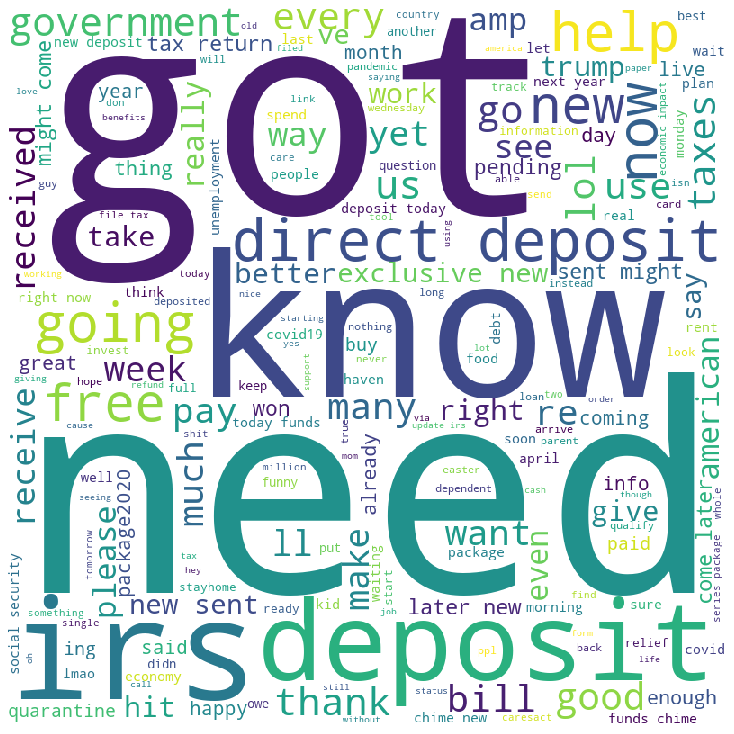

In [30]:

plot_wordcloud(Positive_tweets1['Clean_Text'],"positive")


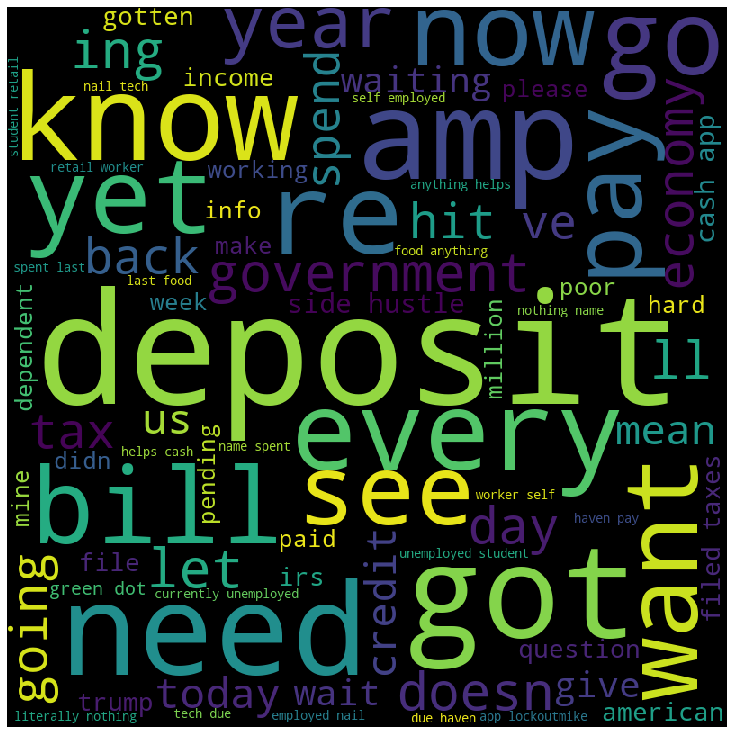

In [31]:
plot_wordcloud(Negative_tweets1['Clean_Text'],"negative")

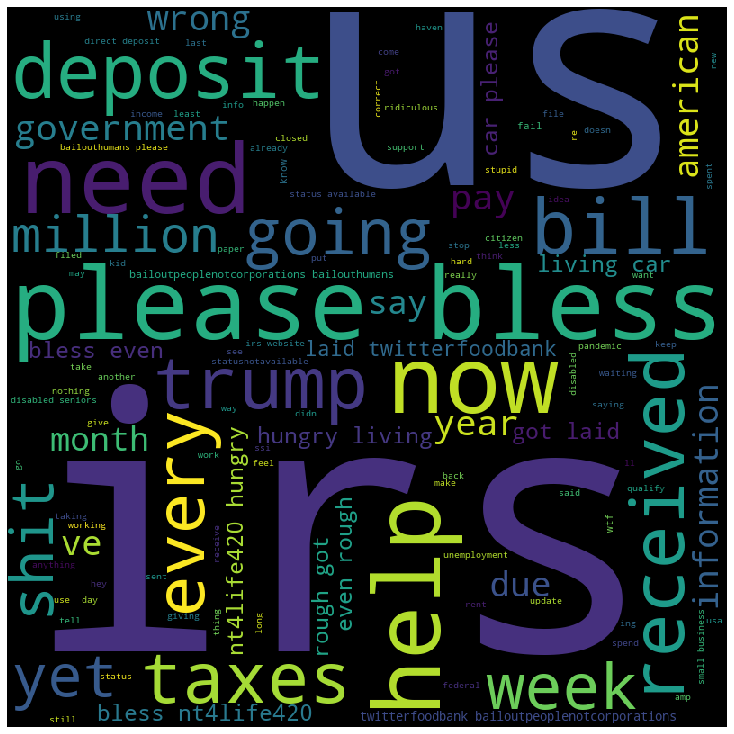

In [36]:
plot_wordcloud(Negative_tweets2['Clean_Text'],"negative")

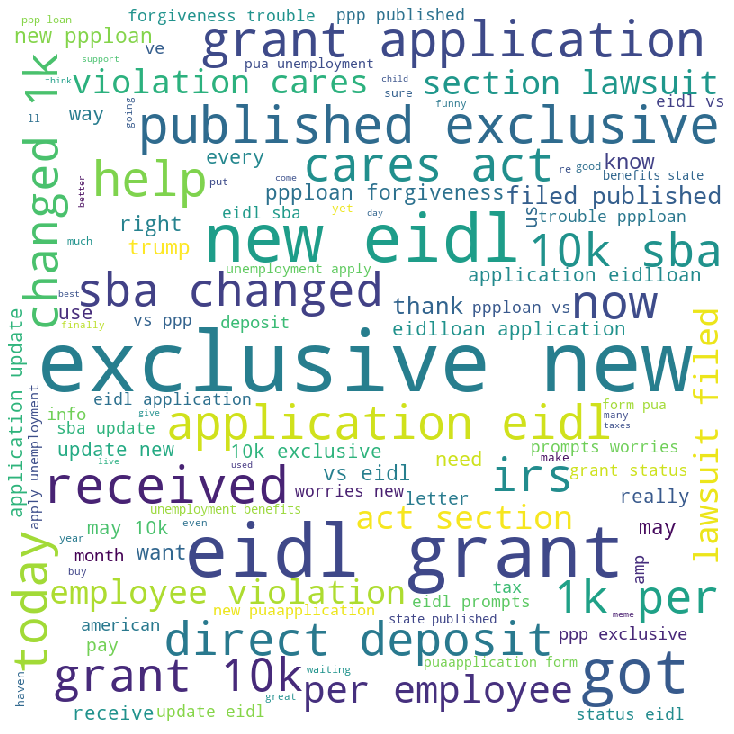

In [38]:
plot_wordcloud(Positive_tweets3['Clean_Text'],"positive")

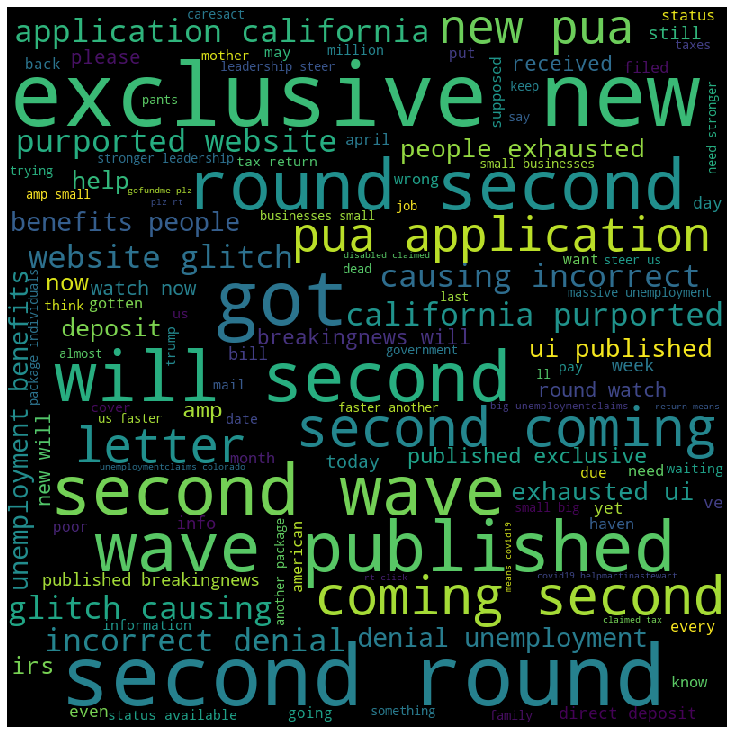

In [39]:
plot_wordcloud(Negative_tweets3['Clean_Text'],"negative")

In [43]:
#plotting word cloud
    
def plot_common_words(text,sentiment):
    stopwords = set(STOPWORDS) 
    total_words=[]
    filtered_sentence=[]
# iterate through the csv file 
    for val in text: 
      
    # typecaste each val to string 
        val = str(val) 
  
    # split the value 
        tokens = val.split() 
      
    # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 
        total_words.append(tokens)
    
    for words in total_words: 
        for w in words:
            if w not in stopwords: 
                if len(w)>2:
                    filtered_sentence.append(w) 
    tweet_collection = collections.Counter(filtered_sentence)

    tweet_collection.most_common(25)
    clean_tweets_nsw = pd.DataFrame(tweet_collection.most_common(25),
                             columns=['words', 'count'])

    fig, ax = plt.subplots(figsize=(10, 10))

    # Plot horizontal bar graph
    if sentiment== "positive":
        color="lightgreen"
    else:
        color="orange"

    clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color=color)

    ax.set_title("Common Words Found in Tweets (Without Stop Words)")

    plt.show()


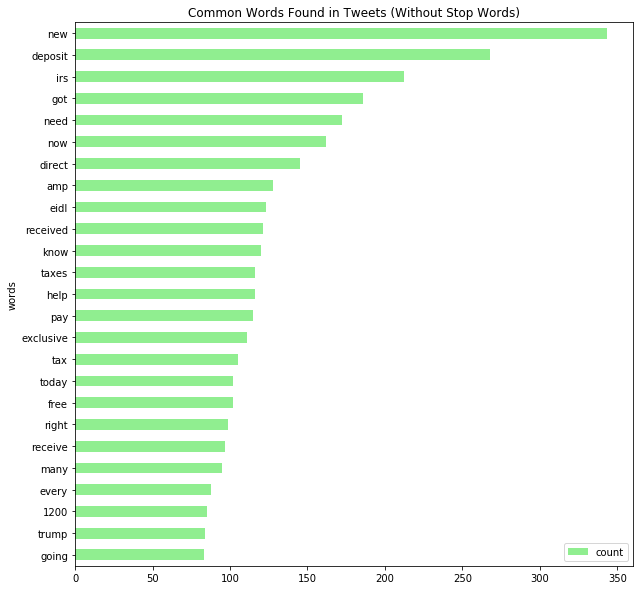

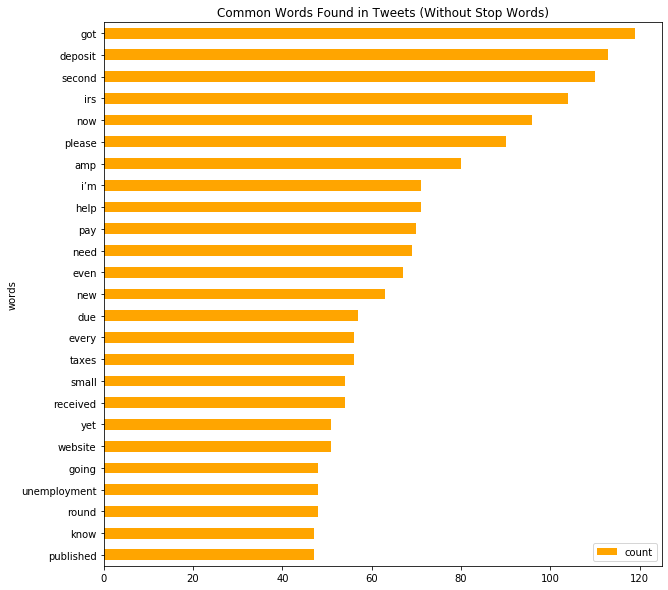

In [45]:

import collections
First_word= pd.DataFrame()
Second_word= pd.DataFrame()
Third_word= pd.DataFrame()

First_word['Tweet']=Positive_tweets1['Clean_Text'].append(Positive_tweets2['Clean_Text']).append(Positive_tweets3['Clean_Text'])
Second_word['Tweet']=Negative_tweets1['Clean_Text'].append(Negative_tweets2['Clean_Text']).append(Negative_tweets3['Clean_Text'])


plot_common_words(First_word['Tweet'],"positive")
plot_common_words(Second_word['Tweet'],"negative")
